## Exploratory Data Aalysis for Bacteria Antibiotics Resistance

The goal of this notebook is to explore data to determine precisely our objectives of prediction on the cleaned dataset, to find some interesting features to engineer.

## Library importation

In [102]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
plt.style.use('default')
plt.rcParams["figure.figsize"] = (16, 8)


In [2]:
!pip install plotly

In [3]:
!pip install nbformat

In [4]:
!pip install --upgrade notebook ipykernel jupyter_client nbconvert

## Errors handling

In [5]:
class StopExecution(Exception):
    def _render_traceback_(self):
        return []

## Data Importation

In [51]:
CLEAN_DATASET_PATH = Path("./data/cleaned_bacteria_dataset.csv")

if not CLEAN_DATASET_PATH.exists():
    print("Could not find the dataset at path:", CLEAN_DATASET_PATH)
    raise StopExecution

try:
    CLEAN_BACTERIA_RESISTANCE_DF = pd.read_csv(CLEAN_DATASET_PATH)
except Exception:
    raise StopExecution(
        f"""Something went wrong while loading the dataset.
You probably made a mistake while generating the dataset file on your machine:
{CLEAN_DATASET_PATH.resolve()}"""
    )

print(f"Dataset loaded successfully with shape: {CLEAN_BACTERIA_RESISTANCE_DF.shape}")
print("Here is a preview of the first 5 lines:")
display(CLEAN_BACTERIA_RESISTANCE_DF.head())

Dataset loaded successfully with shape: (9957, 28)
Here is a preview of the first 5 lines:


,id,name,email,address,diabetes,hypertension,hospital_before,infection_freq,collection_date,notes,...,ipm_norm,gen_norm,an_norm,acide_nalidixique_norm,ofx_norm,cip_norm,c_norm,co-trimoxazole_norm,furanes_norm,colistine_norm
0,S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",False,False,False,0.0,2025-02-05,Patient had fever??,...,R,S,S,S,S,S,R,S,S,S
1,S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown...",True,False,False,3.0,2021-05-08,تم العلاج,...,R,S,S,S,S,S,S,S,S,S
2,S292,Erin Cooke,erin.cooke@example.com,"76661 Isaiah Manors, North Benjamin, HI 85195",True,False,False,3.0,2022-05-01,NADA,...,S,S,S,S,S,R,R,S,S,S
3,S294,Erika Stewart,erika.stewart@example.com,"76838 Patrick Green Suite 538, Torresmouth, ME...",False,True,False,1.0,NaN,NADA,...,R,R,R,S,S,S,S,S,S,S
4,S295,Krystal Riley,krystal.riley@example.com,"USNS Neal, FPO AA 98816",True,False,False,3.0,2020-01-05,Patient had fever??,...,S,S,R,S,S,S,S,S,S,S


Let's print some basics informations about the dataset like data types, null values

In [52]:
CLEAN_BACTERIA_RESISTANCE_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9957 non-null   object 
 1   name                    9957 non-null   object 
 2   email                   9957 non-null   object 
 3   address                 9957 non-null   object 
 4   diabetes                9947 non-null   object 
 5   hypertension            9947 non-null   object 
 6   hospital_before         9947 non-null   object 
 7   infection_freq          9714 non-null   float64
 8   collection_date         7343 non-null   object 
 9   notes                   9957 non-null   object 
 10  age                     9947 non-null   float64
 11  gender                  9947 non-null   object 
 12  strain_norm             9947 non-null   object 
 13  amx/amp_norm            9957 non-null   object 
 14  amc_norm                9957 non-null   

In [53]:
CLEAN_BACTERIA_RESISTANCE_DF.isna().sum()

id                           0
name                         0
email                        0
address                      0
diabetes                    10
hypertension                10
hospital_before             10
infection_freq             243
collection_date           2614
notes                        0
age                         10
gender                      10
strain_norm                 10
amx/amp_norm                 0
amc_norm                     0
cz_norm                      0
fox_norm                     0
ctx/cro_norm                 0
ipm_norm                     0
gen_norm                     0
an_norm                      0
acide_nalidixique_norm       0
ofx_norm                     0
cip_norm                     0
c_norm                       0
co-trimoxazole_norm          0
furanes_norm                 0
colistine_norm               0
dtype: int64

We see that there are still some missing values and the types are not correctly defined.

In [55]:
missing_matrix = CLEAN_BACTERIA_RESISTANCE_DF.isnull().astype(int)

In [57]:
fig = px.imshow(
    missing_matrix,       # Transposer pour que les colonnes soient en y
    labels=dict(x="Column", y="Row", color="Missing"),
    x=CLEAN_BACTERIA_RESISTANCE_DF.columns,             # lignes du DataFrame
    y=CLEAN_BACTERIA_RESISTANCE_DF.index,           # colonnes
    color_continuous_scale='Viridis',
    aspect="auto",
    title="Heatmap of Missing Values"
)

fig.show()

In [ ]:

bool_cols = ["diabetes", "hospital_before", "hypertension"]
long_df = CLEAN_BACTERIA_RESISTANCE_DF[bool_cols].melt(var_name='variable', value_name='value')
count_df = long_df.groupby(['variable','value']).size().reset_index(name='count')

,variable,value,count
0,diabetes,False,7883
1,diabetes,True,2064
2,hospital_before,False,7008
3,hospital_before,True,2939
4,hypertension,False,7470
5,hypertension,True,2477


In [ ]:
# Bar plot interactif pour la colonne 'diabetes'
fig = px.bar(
    count_df,
    x='variable', 
    y='count',    
    color='value',    
    barmode='group', 
    labels={'variable':'Variable', 'count':'Count', 'value':'Presence'},
    title='Counts for Boolean Variables'
)
fig.show()

In [26]:
nbr_of_strains = CLEAN_BACTERIA_RESISTANCE_DF["strain_norm"].value_counts()
nbr_of_strains = nbr_of_strains.reset_index()
nbr_of_strains

,strain_norm,count
0,Escherichia coli,6083
1,Enterobacteria spp.,997
2,Proteus mirabilis,742
3,Klebsiella pneumoniae,702
4,Citrobacter spp.,481
5,Morganella morganii,305
6,Serratia marcescens,256
7,Pseudomonas aeruginosa,200
8,Acinetobacter baumannii,181


We want to see what strains has each person in the dataset.

In [ ]:
fig = px.pie(
    nbr_of_strains,
    names='strain_norm',    # labels
    values='count',    # sizes
    title='Distribution of Bacterial Strains',
    hole=0.3           # donut chart
)
fig.update_layout(width=800, height=700)
fig.show()

In [73]:
age_df = CLEAN_BACTERIA_RESISTANCE_DF["age"].value_counts()
age_df = age_df.reset_index()
age_df

,age,count
0,40.0,199
1,50.0,193
2,45.0,188
3,46.0,182
4,48.0,181
...,...,...
86,10.0,66
87,4.0,65
88,3.0,60
89,9.0,58


In [ ]:
fig = px.bar(
    age_df,
    x='age',
    y='count',
    title='Distribution of Age'
)
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.show()

In [ ]:
fig = px.histogram(
    CLEAN_BACTERIA_RESISTANCE_DF,
    x='age',
    nbins=50,
    labels={'age': 'Age'},
    title='Distribution of Age'
)
fig.show()

In [ ]:
fig = px.histogram(
    CLEAN_BACTERIA_RESISTANCE_DF,
    x='infection_freq',
    nbins=10,
    labels={'infection_freq': 'Infection Freq'},
    title='Infection Frequency distribution',
)
fig.show()

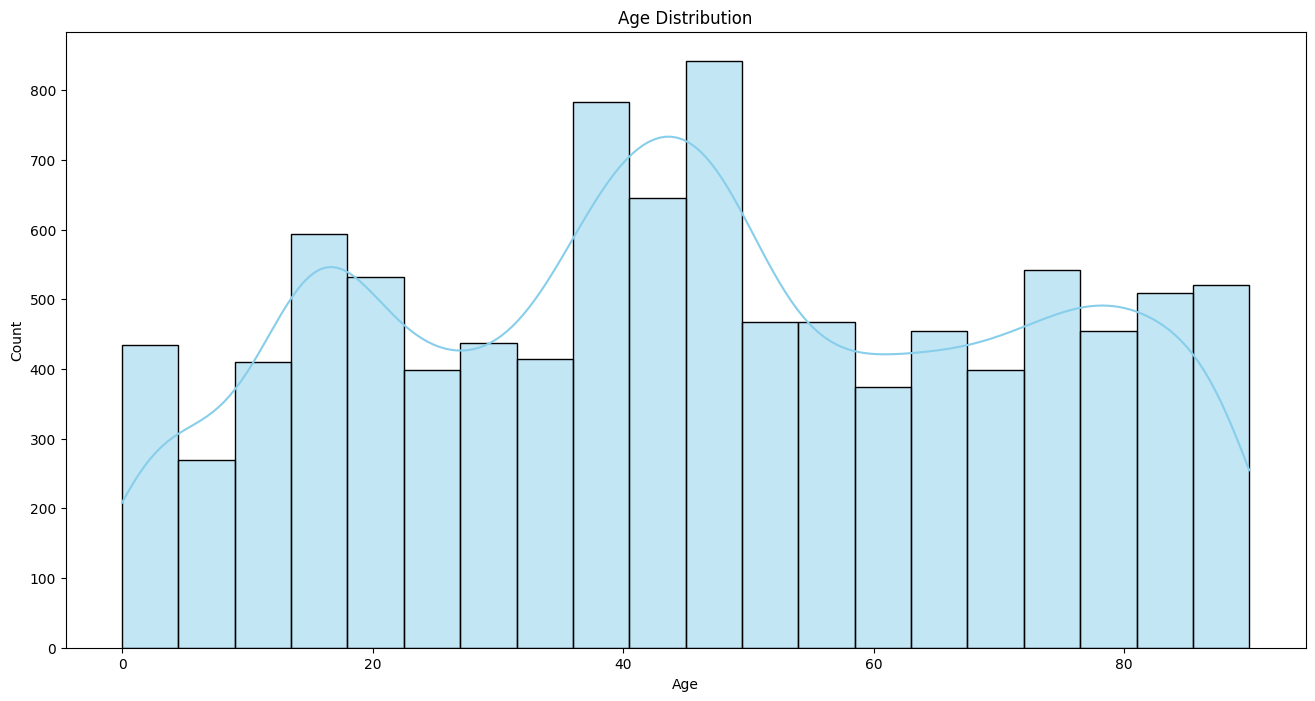

In [104]:
sns.histplot(CLEAN_BACTERIA_RESISTANCE_DF['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

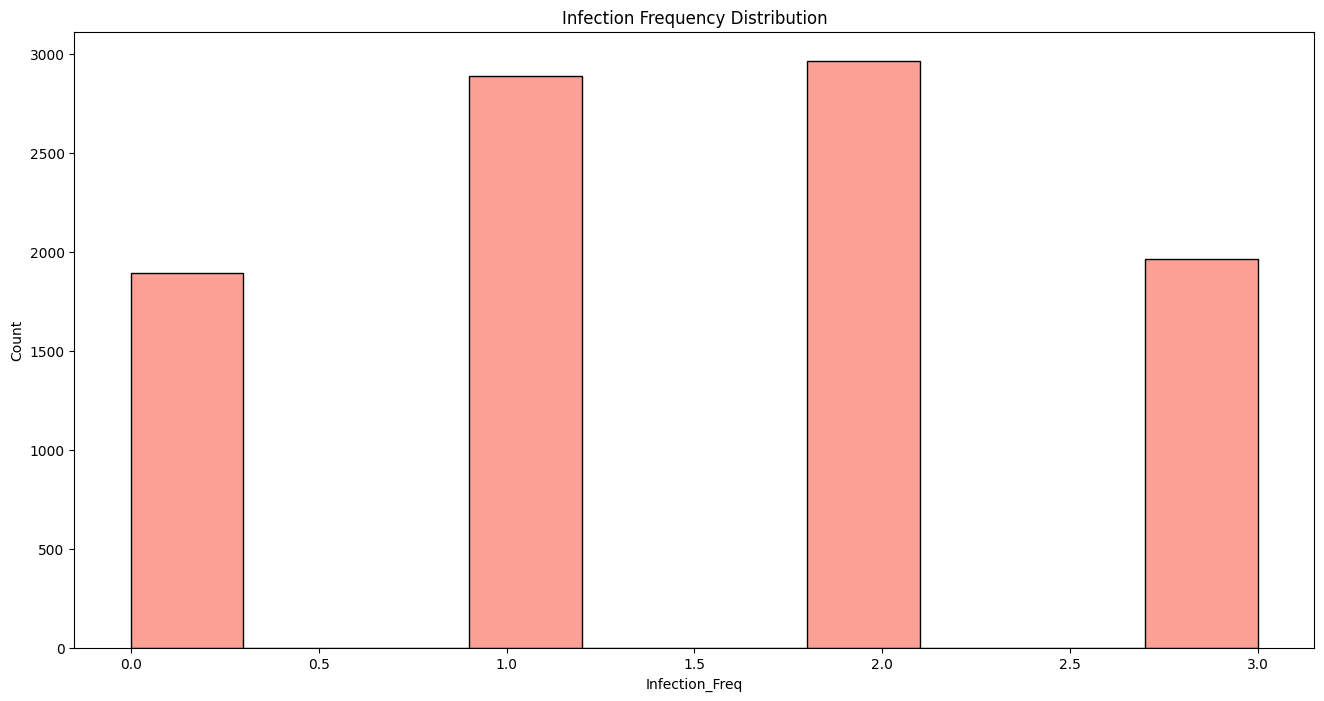

In [ ]:
sns.histplot(CLEAN_BACTERIA_RESISTANCE_DF['infection_freq'], bins=10, kde=False, color='salmon')
plt.title('Infection Frequency Distribution')
plt.xlabel('Infection_Freq')
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_31760\1259953431.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




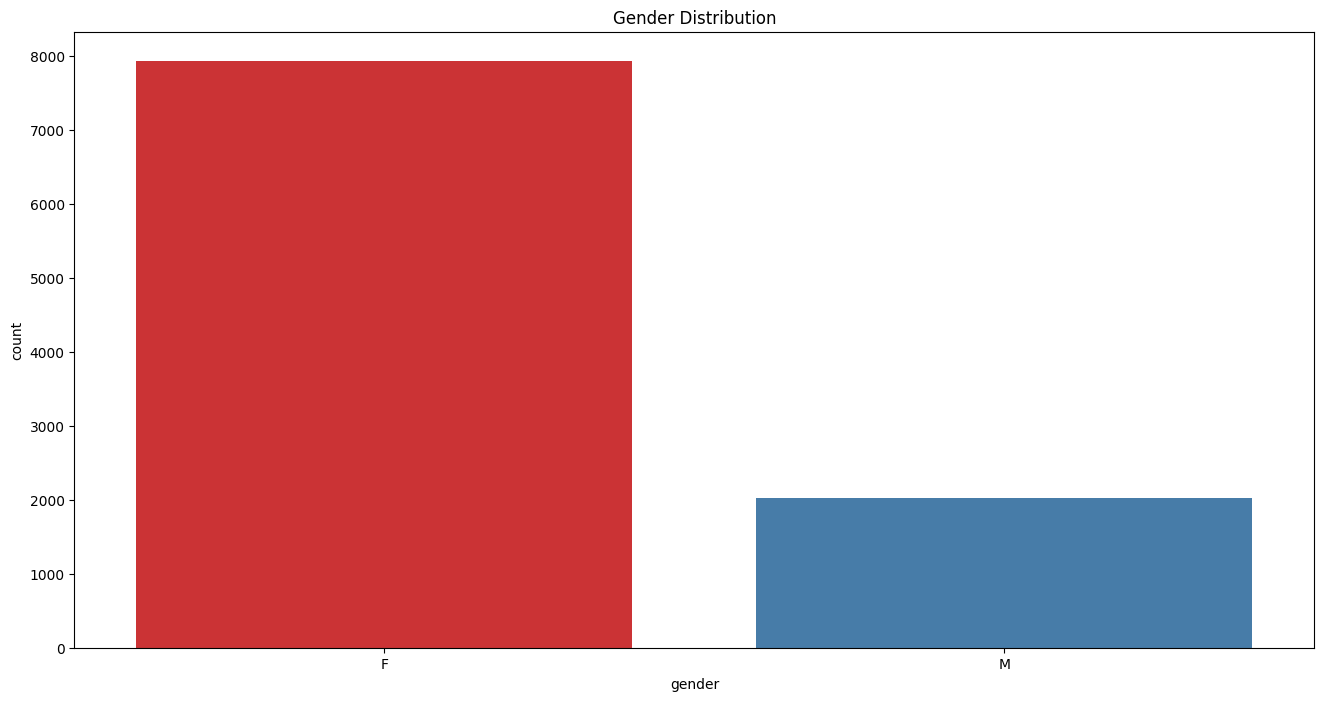

In [123]:
sns.countplot(x='gender', data=CLEAN_BACTERIA_RESISTANCE_DF, palette='Set1')
plt.title('Gender Distribution')
plt.show()

In [128]:
df_gender = CLEAN_BACTERIA_RESISTANCE_DF["gender"].value_counts()
df_gender = df_gender.reset_index()
df_gender

,gender,count
0,F,7929
1,M,2018


In [131]:
fig = px.bar(
    df_gender,
    x='gender', 
    y='count',    
    color='gender',
    labels={'variable':'Variable', 'gender':'gender', 'count':'Count'},
    title='Gender count'
)
fig.show()

We can now isolate the Antibiotics columns...

In [ ]:
ab_cols = [
    'amx/amp_norm', 'amc_norm', 'cz_norm', 'fox_norm', 'ctx/cro_norm', 'ipm_norm', 'gen_norm',
    'an_norm', 'acide_nalidixique_norm', 'ofx_norm', 'cip_norm', 'c_norm',
    'co-trimoxazole_norm', 'furanes_norm', 'colistine_norm'
]

...to compute some statistics about the resistance paterns per antibiotics.

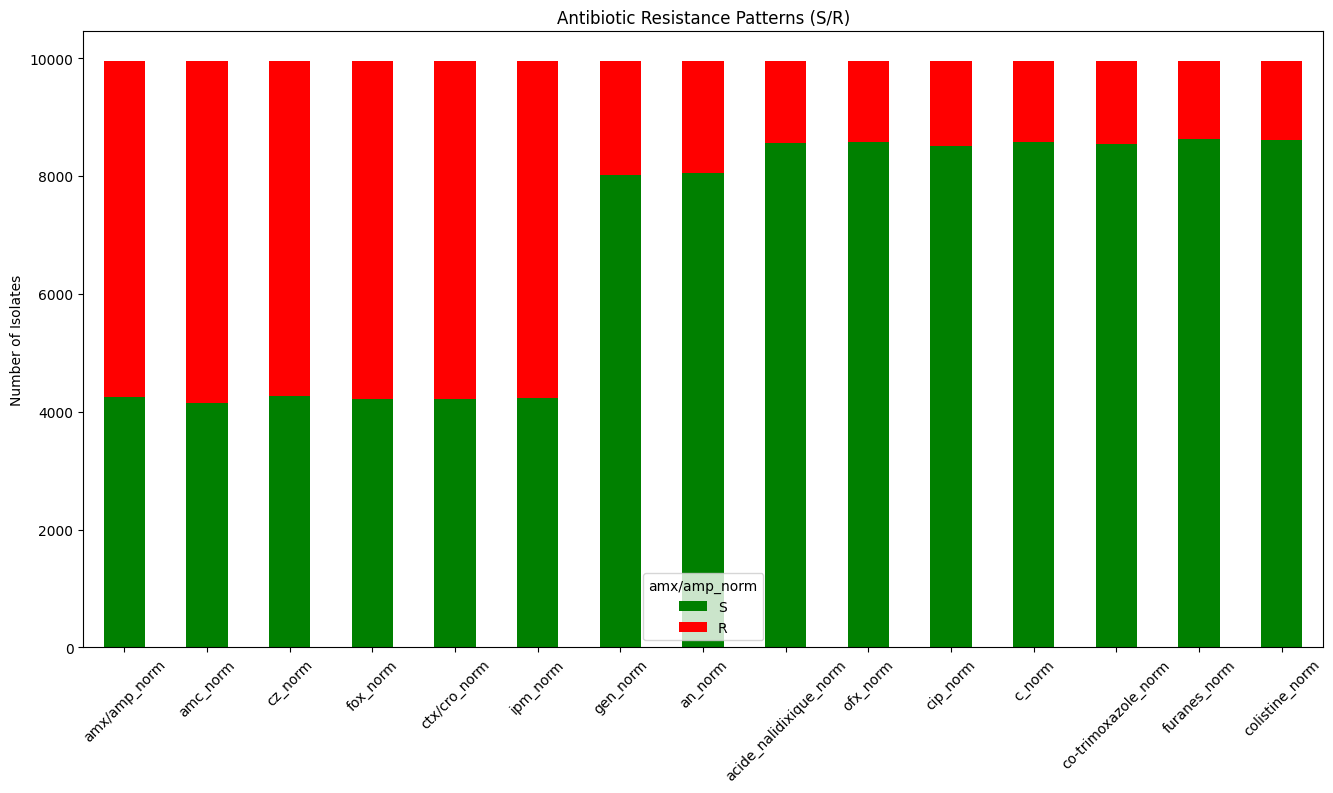

In [133]:
res_counts = pd.DataFrame()

for col in ab_cols:
    res_counts[col] = CLEAN_BACTERIA_RESISTANCE_DF[col].value_counts()

res_counts.T[['S','R']].plot(kind='bar', stacked=True, color=['green','red'])

plt.title('Antibiotic Resistance Patterns (S/R)')
plt.ylabel('Number of Isolates')
plt.xticks(rotation=45)
plt.show()

In [119]:
corr = CLEAN_BACTERIA_RESISTANCE_DF[ab_cols].replace({'R': 0, 'S': 1}).corr()

fig = px.imshow(
    corr,
    text_auto=True,                
    color_continuous_scale='RdBu_r',
    title='Correlation between Antibiotic Resistances',
    labels=dict(x="Antibiotic", y="Antibiotic", color="Correlation")
)

fig.update_layout(width=800, height=700)
fig.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_31760\1374120088.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



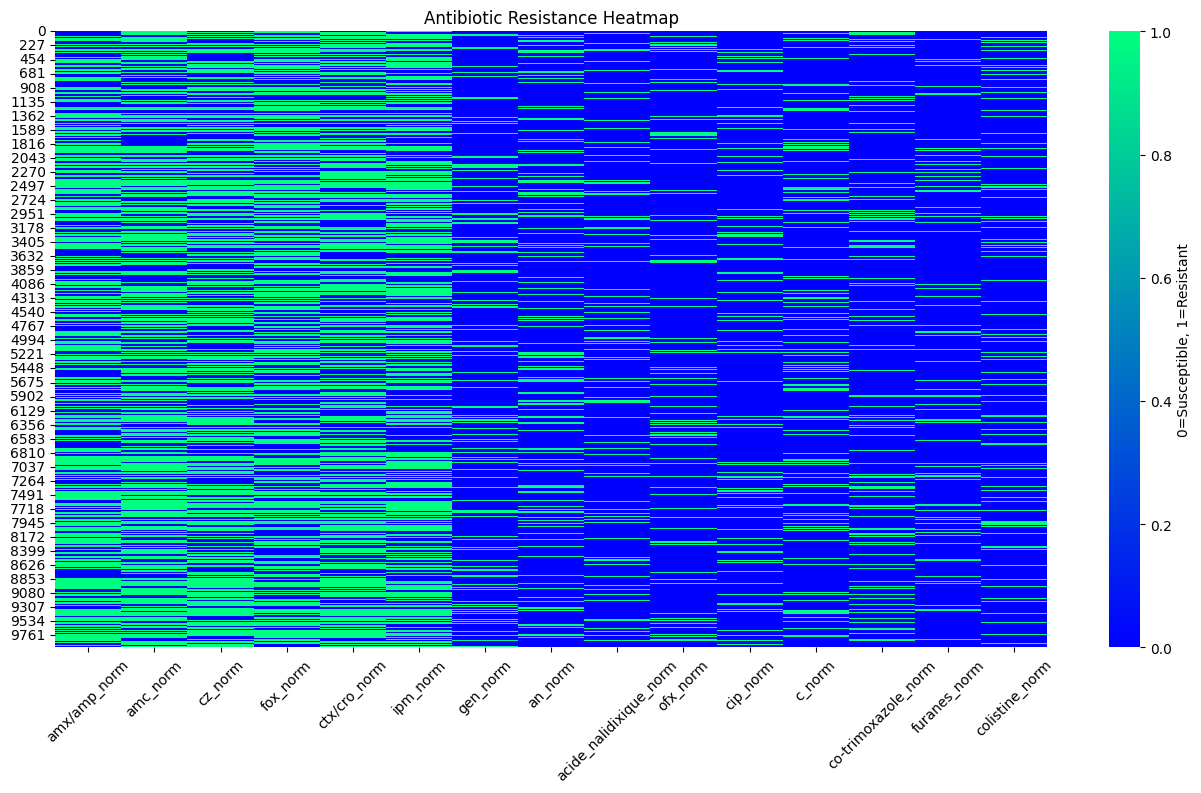

In [117]:
resistance_heatmap_data = CLEAN_BACTERIA_RESISTANCE_DF[ab_cols].map(
    lambda x: 1 if x == 'R' else (0 if x == 'S' else np.nan)
)

plt.figure()
sns.heatmap(
    resistance_heatmap_data,
    cmap='winter',
    cbar_kws={'label': '0=Susceptible, 1=Resistant'}
)
plt.title('Antibiotic Resistance Heatmap')
plt.xticks(rotation=45)
plt.show()